### **MLP**

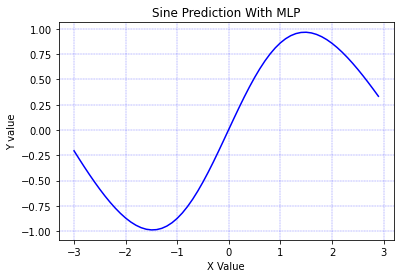

In [2]:
import numpy as np
from keras.layers import Dense, Activation
from keras.models import Sequential
import matplotlib.pyplot as plt

pi = np.pi

x_train_MLP = np.arange(-3, 3, 0.1)
y_train_MLP = (np.sin(x_train_MLP)+1)/2 

MLP = Sequential()
MLP.add(Dense(10, input_dim=1, input_shape=(1,), activation='sigmoid'))
MLP.add(Dense(1))

MLP.compile(loss='mean_squared_error', optimizer='SGD', metrics=['mean_squared_error'])
MLP.fit(x_train_MLP, y_train_MLP, epochs=100000, batch_size=8, verbose=0)

predicted_MLP = 2 * MLP.predict(x_train_MLP) - 1

plt.plot(x_train_MLP, predicted_MLP, 'b')
plt.title('Sine Prediction With MLP')
plt.ylabel('Y value')
plt.xlabel('X Value')
plt.grid(color='b', ls = '-.', lw = 0.25)
plt.savefig('mlp.png')
plt.show()

### **RBF**

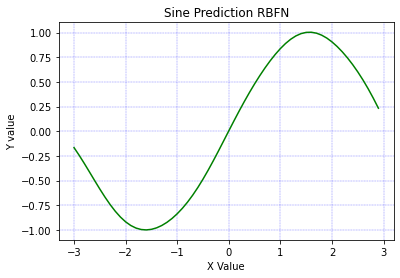

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random


class RBF(object):

    def __init__(self, shape, sigma=0.5):
        self.shape = shape
        self.sigma = sigma
        self.centers = None
        self.weights = None

    def gaussian_kernel(self, center, data_point):
        return np.exp(-1 * self.sigma * (np.linalg.norm(center - data_point) ** 2))

    def interpolation_matrix(self, X):
        matrix = np.zeros(len(X) * self.shape)
        counter = 0
        for inp in X:
            for center in self.centers:
                kernel = self.gaussian_kernel(center, inp)
                matrix[counter] = kernel
                counter += 1
        return matrix.reshape(len(X), self.shape)

    def select_centers(self, X):
        centers = []
        random_indices = random.sample(range(0, len(X)), self.shape)
        for rnd in random_indices:
            centers.append(X[rnd])
        return np.array(centers)

    def fit(self, X, Y):
        self.centers = self.select_centers(X)
        im = self.interpolation_matrix(X)
        self.weights = np.dot(np.linalg.pinv(im), Y)

    def predict(self, X):
        im = self.interpolation_matrix(X)
        predictions = np.dot(im, self.weights)
        return predictions




x_train_RBF = np.arange(-3, 3, 0.1)
y_train_RBF = np.sin(x_train_RBF)

RBFN = RBF(shape=10)
RBFN.fit(x_train_RBF, y_train_RBF)
y_pred_RBF = RBFN.predict(x_train_RBF)

plt.plot(x_train_RBF, y_pred_RBF, 'g-', label='predicted')
plt.title('Sine Prediction RBFN')
plt.ylabel('Y value')
plt.xlabel('X Value')
plt.grid(color='b', ls = '-.', lw = 0.25)
plt.savefig('rbf.png')        
plt.show()

### **Compare**

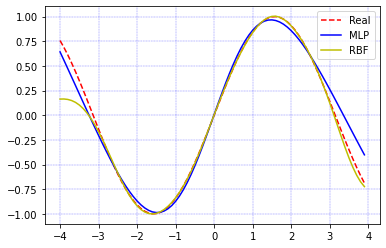

In [4]:
x_train_compare = np.arange(-4, 4, 0.1)

MLP_prediction = 2 * MLP.predict(x_train_compare) - 1

RBF_prediction = RBFN.predict(x_train_compare)

real_values = np.sin(x_train_compare)

plt.plot(x_train_compare, real_values, 'r--', label='Real')
plt.plot(x_train_compare, MLP_prediction, 'b-', label='MLP')
plt.plot(x_train_compare, RBF_prediction, 'y-', label='RBF')

plt.legend(loc='upper right')
plt.grid(color='b', ls = '-.', lw = 0.25)
plt.savefig('compare.png')
plt.show()